### Hebbian Readout Error

**I. Practical definitions**:

1. hebbian weights:

$W_{j}=\sum_{m=1}^{P}\left(\bar{C}_{j}^{m}-f\right) L^{m}$ 

$L^m \in \{-1,1\}$, randomly assigned to each cluster center, each with 1/2 probability.

$\bar{C}^{m}$ are center pattern of cluster $m$ on cortical layer

2. Classify results:

$y^m = \operatorname{sign}\left[\sum_{j=1}^{N_{C}} W_{j}\left(C_{j}^{m}-f\right)\right]$

$C^{m}$ could be pattern with noise

3. Readout error:

$\varepsilon=\left\langle\left|L^{m}-\operatorname{sign}\left(\sum_{j=1}^{N_{c}} W_{j}\left(C_{j}^{m}-f\right)\right)\right|\right\rangle / 2$

**II. Key parameters involved**

1. Related to capacity:

P, K, Nc, N, M, Sparsity f

2. Related to noise:

$\Delta \xi$

$\Delta \phi$

3. Our key parameter:

mixing order $\mathcal{M}$

**III. Simulation Plans**

**1. Readout error with relation to sparsity f**

set $N_m = 3$, $N= M = 100$, $N_c = 1000$, $P=10$, $K=2$


Try sparsity f in $(10^{-3},0.6)$, 20 points

(1). no noise

(2). $\Delta \xi = 0.3$

(3). All modalities has 0.1 noise

**2. Readout error with relation to P**

Capacity related, 

set $N_m = 3$, $N= M = 100$, $N_c = 1000$, $K=2$ 

Try K in 1 to 100, 20 points

(1). sparsity = 0.2, no noise

(2). sparsity = 0.005, no noise

(3). sparsiy = 0.005, add $\Delta xi = 0.3$

(4). Sparsity = 0.005, add $\Delta xi = \Delta \phi = 0.1$

**3. Readout error with relation to Mixing Order m**

set $Nm = 6$, $N= M = 100$, $N_c = 3000$, $K = 2$, $P = 10$

set sparsity = 0.005, change mixing order m

(1). add $\Delta \xi$ only, from 0.05 to 0.7, 20 points

(2). add both $\Delta \xi$ and $\Delta \phi$, from 0.05 to 0.7, 20 points

In [1]:
from mix_forward import mix_forward
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
from tqdm import tqdm_notebook

def hebbian_weight(matrix_C,labels,f=0.5): 
    
    # m - f, make mean zero
    norm_C = matrix_C.copy() - f
    
    W = np.matmul(labels,norm_C)
    
    return W

def hebbian_readout(matrix_C,weight,f=0.5):
    
    # m - f, make mean zero
    norm_C = matrix_C.copy() - f
    
    y = np.sign(np.matmul(norm_C,weight))
    
    return y

def readout_error(y,labels):
    
    return((y!=labels).sum()/float(y.size))

#### 1. Readout error with relation to sparsity f

#### 1.1 No noise

In [2]:
P = 10
K = 2
Nc = 1000
N = 100
M = 100
Nm = 3

####### *test_part* ######

In [115]:
model3_test = mix_forward(Nm,N,M,P,K,Nc)

model3_test.generate_input()

h = model3_test.order_m(1,return_m=False)

labels = np.sign(np.random.randn(P*K*K))

m,T = mix_forward.fix_sparsity(_,h,f=0.01)

W = hebbian_weight(m,labels,f=0.01)

y = hebbian_readout(m,W,f=0.01)

print(readout_error(y,labels))

In [116]:
model3_test.J_0.shape

(334, 100)

In [3]:
record1_1 = np.zeros((100,3,20))

In [4]:
flist = 10**np.linspace(-3,-0.2,20)

In [5]:
for repeat in tqdm_notebook(range(100)):
    
    model3_erf = mix_forward(Nm,N,M,P,K,Nc)
    model3_erf.generate_input()
    labels = np.sign(np.random.randn(P*K*K))
    
    for m in range(1,4):
        
        h_m = model3_erf.order_m(m,return_m=False)   # slow step
        
        for i,f in enumerate(flist):
            
            Cm,T = mix_forward.fix_sparsity(_,h_m,f=f)
            
            W_m = hebbian_weight(Cm,labels,f=f)
            
            y_m = hebbian_readout(Cm,W_m,f=f)
            
            record1_1[repeat,m-1,i] = readout_error(y_m,labels)

In [6]:
record1_1_mean = np.mean(record1_1,axis=0)
record1_1_std = np.std(record1_1,axis=0)

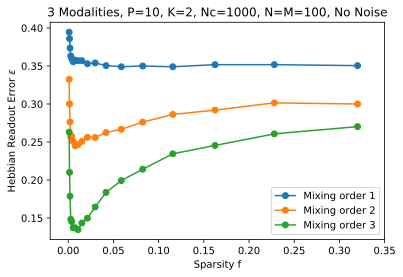

Optimal Sparsity ~ 0.005


In [8]:
display.set_matplotlib_formats('svg')

for m in range(3):
    #plt.errorbar(flist,record1_1_mean[m,:],yerr=record1_1_std[m,:],marker='o',capsize=2,label='Mixing order {}'.format(m+1))
    plt.plot(flist[:-2],record1_1_mean[m,:-2],'-o',label='Mixing order {}'.format(m+1))

plt.legend()
plt.xlim(-0.02,0.35)
plt.title('3 Modalities, P=10, K=2, Nc=1000, N=M=100, No Noise')
plt.xlabel('Sparsity f')
plt.ylabel(r'Hebbian Readout Error $\epsilon$')
plt.show()    
print('Optimal Sparsity ~ 0.005')

#### 1.2 Add noise only to first modality

In [9]:
P = 10
K = 2
Nc = 1000
N = 100
M = 100
Nm = 3
delta_xi = 0.3

In [10]:
def flip_matrix(data,noise_parameter):
    flip_vector = np.sign(np.random.rand(data.shape[0],data.shape[1])-noise_parameter/2.)
    return data*flip_vector

####test_part####

In [40]:
model3_test = mix_forward(Nm,N,M,P,K,Nc)
model3_test.generate_input()
labels = np.sign(np.random.randn(P*K*K))

center_0 = model3_test.data_0.copy()
center_1 = model3_test.data_1.copy()
center_2 = model3_test.data_2.copy()

h_m = model3_test.order_m(3,return_m=False)

Cm,T = mix_forward.fix_sparsity(_,h_m,f=0.1)

W_m = hebbian_weight(Cm,labels,f=0.1)

y_m = hebbian_readout(Cm,W_m,f=0.1)

print(readout_error(y_m,labels))

model3_test.data_0 = flip_matrix(center_0,0.5)

h_m_noise = model3_test.order_m(3,return_m=False,initial_J=False)

Cm_noise,T = mix_forward.fix_sparsity(_,h_m_noise,f=0.1)

y_m_noise = hebbian_readout(Cm_noise,W_m,f=0.1)

print(readout_error(y_m_noise,labels))

In [11]:
record1_2 = np.zeros((5,3,20))
flist = 10**np.linspace(-3,-0.2,20)

In [12]:
for repeat in tqdm_notebook(range(5)):
    
    model3_erf_noise1 = mix_forward(Nm,N,M,P,K,Nc)
    model3_erf_noise1.generate_input()
    labels = np.sign(np.random.randn(P*K*K))
    
    # record the center patterns, for each modality
    center_0 = model3_erf_noise1.data_0.copy()
    center_1 = model3_erf_noise1.data_1.copy()
    center_2 = model3_erf_noise1.data_2.copy()
    
    for m in range(1,4):
        
        h_m = model3_erf_noise1.order_m(m,return_m=False)   # slow step
        
        for i,f in enumerate(flist):
            
            # generate hebbian weights with center patterns
            
            Cm,T = mix_forward.fix_sparsity(_,h_m,f=f)
            
            W_m = hebbian_weight(Cm,labels,f=f)
            
            flip_record = []  # record error for each noisy flip
            
            for fliptime in range(20):
                
                # only add noise to the first modality
                model3_erf_noise1.data_0 = flip_matrix(center_0,delta_xi)
                
                # mix the noisy input forward, without changing the connection matrix
                h_m_noise = model3_erf_noise1.order_m(m,return_m=False,initial_J=False)
                
                Cm_noise,T = mix_forward.fix_sparsity(_,h_m_noise,f=f)
                
                # get the hebbian readout for the noisy inputs, with weight from center patterns 
                y_m_noise = hebbian_readout(Cm_noise,W_m,f=f)
                
                flip_record.append(readout_error(y_m_noise,labels))
            
        
            record1_2[repeat,m-1,i] = np.mean(flip_record)

In [13]:
record1_2_mean = np.mean(record1_2,axis=0)

In [53]:
record1_2_mean = np.loadtxt('readout_error_results/record1_2_mean.txt')

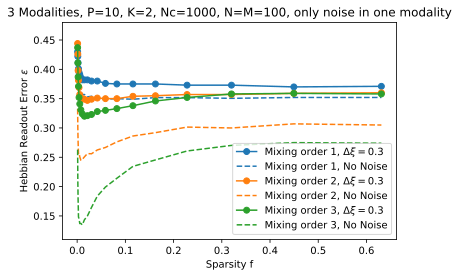

In [71]:
display.set_matplotlib_formats('svg')
color = ['tab:blue','tab:orange','tab:green']
for m in range(3):
    #plt.errorbar(flist,record1_1_mean[m,:],yerr=record1_1_std[m,:],marker='o',capsize=2,label='Mixing order {}'.format(m+1))
    plt.plot(flist,record1_2_mean[m,:],'-o',label=r'Mixing order {}, $\Delta \xi = 0.3$'.format(m+1),color = color[m])
    plt.plot(flist,record1_1_mean[m,:],'--',label=r'Mixing order {}, No Noise'.format(m+1),color = color[m])

plt.legend()
#plt.xlim(-0.02,0.35)
plt.title(r'3 Modalities, P=10, K=2, Nc=1000, N=M=100, only noise in one modality')
plt.ylim(0.11,0.48)
plt.xlabel('Sparsity f')
plt.ylabel(r'Hebbian Readout Error $\epsilon$')
plt.show()  

#### 1.3 Add noise to all modality

In [16]:
P = 10
K = 2
Nc = 1000
N = 100
M = 100
Nm = 3
delta_xi = 0.1
delta_phi = 0.1

In [17]:
record1_3 = np.zeros((5,3,20))
flist = 10**np.linspace(-3,-0.2,20)

In [18]:
for repeat in tqdm_notebook(range(5)):
    
    model3_erf_noise2 = mix_forward(Nm,N,M,P,K,Nc)
    model3_erf_noise2.generate_input()
    labels = np.sign(np.random.randn(P*K*K))
    
    # record the center patterns, for each modality
    center_0 = model3_erf_noise2.data_0.copy()
    center_1 = model3_erf_noise2.data_1.copy()
    center_2 = model3_erf_noise2.data_2.copy()
    
    for m in range(1,4):
        
        h_m = model3_erf_noise2.order_m(m,return_m=False)   # slow step
        
        for i,f in enumerate(flist):
            
            # generate hebbian weights with center patterns
            
            Cm,T = mix_forward.fix_sparsity(_,h_m,f=f)
            
            W_m = hebbian_weight(Cm,labels,f=f)
            
            flip_record = []  # record error for each noisy flip
            
            for fliptime in range(20):
                
                # add noise to all modalities
                model3_erf_noise2.data_0 = flip_matrix(center_0,delta_xi)
                model3_erf_noise2.data_1 = flip_matrix(center_1,delta_phi)
                model3_erf_noise2.data_2 = flip_matrix(center_2,delta_phi)
                
                
                # mix the noisy input forward, without changing the connection matrix
                h_m_noise = model3_erf_noise2.order_m(m,return_m=False,initial_J=False)
                
                Cm_noise,T = mix_forward.fix_sparsity(_,h_m_noise,f=f)
                
                # get the hebbian readout for the noisy inputs, with weight from center patterns 
                y_m_noise = hebbian_readout(Cm_noise,W_m,f=f)
                
                flip_record.append(readout_error(y_m_noise,labels))
            
        
            record1_3[repeat,m-1,i] = np.mean(flip_record)

In [19]:
record1_3_mean = np.mean(record1_3,axis=0)

In [56]:
record1_3_mean = np.loadtxt('readout_error_results/record1_3_mean.txt')

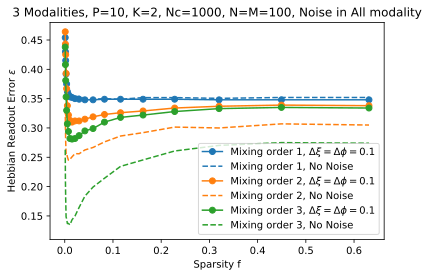

In [70]:
display.set_matplotlib_formats('svg')
color = ['tab:blue','tab:orange','tab:green']
for m in range(3):
    #plt.errorbar(flist,record1_1_mean[m,:],yerr=record1_1_std[m,:],marker='o',capsize=2,label='Mixing order {}'.format(m+1))
    plt.plot(flist,record1_3_mean[m,:],'-o',label=r'Mixing order {}, $\Delta \xi = \Delta \phi = 0.1$'.format(m+1),color = color[m])
    plt.plot(flist,record1_1_mean[m,:],'--',label=r'Mixing order {}, No Noise'.format(m+1),color = color[m])

plt.legend()
#plt.xlim(-0.02,0.35)
plt.title(r'3 Modalities, P=10, K=2, Nc=1000, N=M=100, Noise in All modality')
plt.xlabel('Sparsity f')
plt.ylim(0.11,0.48)
plt.ylabel(r'Hebbian Readout Error $\epsilon$')
plt.show()

#### 2. Readout error, relation to P

#### 2.1 sparsity = 0.005, close to optimal sparsity, no noise

In [27]:
K = 2
Nc = 1000
N = 100
M = 100
Nm = 3
Plist = np.linspace(1,100,20,dtype=np.int)

In [29]:
record2_1 = np.zeros((100,3,20))
f = 0.005

In [30]:
for repeat in tqdm_notebook(range(100)):
    
    for i,P in enumerate(Plist):
        
        model3_erP = mix_forward(Nm,N,M,P,K,Nc)
        model3_erP.generate_input()
        labels = np.sign(np.random.randn(P*K*K))
        
        for m in range(1,4):
            
            h_m = model3_erP.order_m(m,return_m=False)   # slow step
        
            Cm,T = mix_forward.fix_sparsity(_,h_m,f=f)
            
            W_m = hebbian_weight(Cm,labels,f=f)
            
            y_m = hebbian_readout(Cm,W_m,f=f)
            
            record2_1[repeat,m-1,i] = readout_error(y_m,labels)

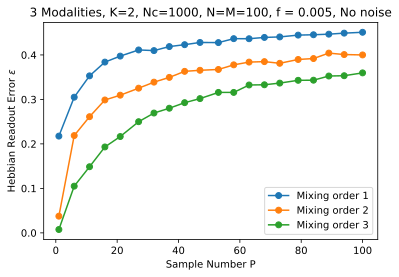

In [31]:
record2_1_mean = np.mean(record2_1,axis=0)

for m in range(3):
    #plt.errorbar(flist,record1_1_mean[m,:],yerr=record1_1_std[m,:],marker='o',capsize=2,label='Mixing order {}'.format(m+1))
    plt.plot(Plist,record2_1_mean[m,:],'-o',label='Mixing order {}'.format(m+1))

plt.legend()
#plt.xlim(-0.02,0.35)
plt.title(r'3 Modalities, K=2, Nc=1000, N=M=100, f = 0.005, No noise')
plt.xlabel('Sample Number P')
plt.ylabel(r'Hebbian Readout Error $\epsilon$')
plt.show()  

#### 2.2 sparsity = 0.2, close to optimal sparsity, no noise

In [32]:
K = 2
Nc = 1000
N = 100
M = 100
Nm = 3
Plist = np.linspace(1,100,20,dtype=np.int)

record2_2 = np.zeros((100,3,20))
f = 0.2


for repeat in tqdm_notebook(range(100)):
    
    for i,P in enumerate(Plist):
        
        model3_erP2 = mix_forward(Nm,N,M,P,K,Nc)
        model3_erP2.generate_input()
        labels = np.sign(np.random.randn(P*K*K))
        
        for m in range(1,4):
            
            h_m = model3_erP2.order_m(m,return_m=False)   # slow step
        
            Cm,T = mix_forward.fix_sparsity(_,h_m,f=f)
            
            W_m = hebbian_weight(Cm,labels,f=f)
            
            y_m = hebbian_readout(Cm,W_m,f=f)
            
            record2_2[repeat,m-1,i] = readout_error(y_m,labels)

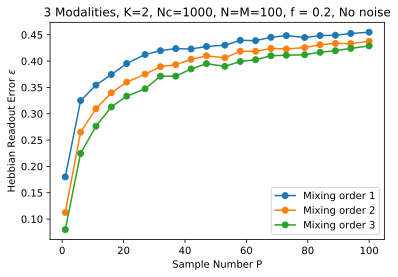

In [39]:
record2_2_mean = np.mean(record2_2,axis=0)

for m in range(3):
    #plt.errorbar(flist,record1_1_mean[m,:],yerr=record1_1_std[m,:],marker='o',capsize=2,label='Mixing order {}'.format(m+1))
    plt.plot(Plist,record2_2_mean[m,:],'-o',label='Mixing order {}'.format(m+1))   


plt.legend()
#plt.xlim(-0.02,0.35)
plt.title(r'3 Modalities, K=2, Nc=1000, N=M=100, f = 0.2, No noise')
plt.xlabel('Sample Number P')
plt.ylabel(r'Hebbian Readout Error $\epsilon$')
plt.show()  

#### 2.3 f = 0.005, add 0.3 noise to first modality

In [43]:
K = 2
Nc = 1000
N = 100
M = 100
Nm = 3
Plist = np.linspace(1,100,20,dtype=np.int)

record2_3 = np.zeros((5,3,20))
f = 0.005
delta_xi = 0.3

for repeat in tqdm_notebook(range(5)):
    
    for i,P in enumerate(Plist):
        
        model3_erP3 = mix_forward(Nm,N,M,P,K,Nc)
        model3_erP3.generate_input()
        labels = np.sign(np.random.randn(P*K*K))
        
        # record the center patterns, for each modality
        center_0 = model3_erP3.data_0.copy()
        center_1 = model3_erP3.data_1.copy()
        center_2 = model3_erP3.data_2.copy()
        
        for m in range(1,4):
            
            h_m = model3_erP3.order_m(m,return_m=False)   # slow step
        
            Cm,T = mix_forward.fix_sparsity(_,h_m,f=f)
            
            W_m = hebbian_weight(Cm,labels,f=f)
            
            
            flip_record = []  # record error for each noisy flip
            
            for fliptime in range(20):
                
                # add noise
                model3_erP3.data_0 = flip_matrix(center_0,delta_xi)
                #model3_erP3.data_1 = flip_matrix(center_1,delta_phi)
                #model3_erP3.data_2 = flip_matrix(center_2,delta_phi)
                
                
                # mix the noisy input forward, without changing the connection matrix
                h_m_noise = model3_erP3.order_m(m,return_m=False,initial_J=False)
                
                Cm_noise,T = mix_forward.fix_sparsity(_,h_m_noise,f=f)
                
                # get the hebbian readout for the noisy inputs, with weight from center patterns 
                y_m_noise = hebbian_readout(Cm_noise,W_m,f=f)
                
                flip_record.append(readout_error(y_m_noise,labels))
            
        
            record2_3[repeat,m-1,i] = np.mean(flip_record)

In [64]:
record2_3_mean = np.loadtxt(r'readout_error_results/record2_3_mean.txt')

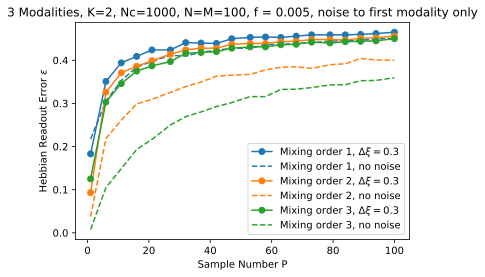

In [65]:
#record2_3_mean = np.mean(record2_3,axis=0)
color = ['tab:blue','tab:orange','tab:green']

for m in range(3):
    #plt.errorbar(flist,record1_1_mean[m,:],yerr=record1_1_std[m,:],marker='o',capsize=2,label='Mixing order {}'.format(m+1))
    plt.plot(Plist,record2_3_mean[m,:],'-o',label=r'Mixing order {}, $\Delta \xi = 0.3$'.format(m+1),color=color[m])
    plt.plot(Plist,record2_1_mean[m,:],'--',label='Mixing order {}, no noise'.format(m+1),color=color[m])

plt.legend()
#plt.xlim(-0.02,0.35)
plt.title(r'3 Modalities, K=2, Nc=1000, N=M=100, f = 0.005, noise to first modality only')
plt.xlabel('Sample Number P')
plt.ylabel(r'Hebbian Readout Error $\epsilon$')
plt.show()  

#### 2.4 f = 0.005, add 0.1 noise to all modality

In [45]:
K = 2
Nc = 1000
N = 100
M = 100
Nm = 3
Plist = np.linspace(1,100,20,dtype=np.int)

record2_4 = np.zeros((5,3,20))
f = 0.005
delta_xi = 0.1
delta_phi = 0.1

for repeat in tqdm_notebook(range(5)):
    
    for i,P in enumerate(Plist):
        
        model3_erP4 = mix_forward(Nm,N,M,P,K,Nc)
        model3_erP4.generate_input()
        labels = np.sign(np.random.randn(P*K*K))
        
        # record the center patterns, for each modality
        center_0 = model3_erP4.data_0.copy()
        center_1 = model3_erP4.data_1.copy()
        center_2 = model3_erP4.data_2.copy()
        
        for m in range(1,4):
            
            h_m = model3_erP4.order_m(m,return_m=False)   # slow step
        
            Cm,T = mix_forward.fix_sparsity(_,h_m,f=f)
            
            W_m = hebbian_weight(Cm,labels,f=f)
            
            
            flip_record = []  # record error for each noisy flip
            
            for fliptime in range(20):
                
                # add noise
                model3_erP4.data_0 = flip_matrix(center_0,delta_xi)
                model3_erP4.data_1 = flip_matrix(center_1,delta_phi)
                model3_erP4.data_2 = flip_matrix(center_2,delta_phi)
                
                
                # mix the noisy input forward, without changing the connection matrix
                h_m_noise = model3_erP4.order_m(m,return_m=False,initial_J=False)
                
                Cm_noise,T = mix_forward.fix_sparsity(_,h_m_noise,f=f)
                
                # get the hebbian readout for the noisy inputs, with weight from center patterns 
                y_m_noise = hebbian_readout(Cm_noise,W_m,f=f)
                
                flip_record.append(readout_error(y_m_noise,labels))
            
        
            record2_4[repeat,m-1,i] = np.mean(flip_record)

In [66]:
record2_4_mean = np.loadtxt(r'readout_error_results/record2_4_mean.txt')

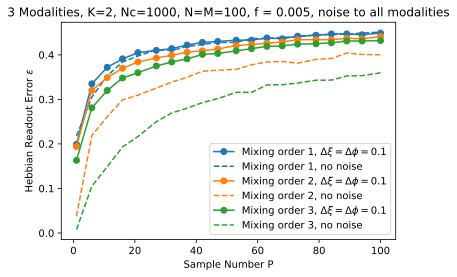

In [67]:
#record2_4_mean = np.mean(record2_4,axis=0)
color = ['tab:blue','tab:orange','tab:green']

for m in range(3):
    #plt.errorbar(flist,record1_1_mean[m,:],yerr=record1_1_std[m,:],marker='o',capsize=2,label='Mixing order {}'.format(m+1))
    plt.plot(Plist,record2_4_mean[m,:],'-o',label=r'Mixing order {}, $\Delta \xi = \Delta \phi = 0.1$'.format(m+1),color=color[m])
    plt.plot(Plist,record2_1_mean[m,:],'--',label='Mixing order {}, no noise'.format(m+1),color=color[m])

plt.legend()
#plt.xlim(-0.02,0.35)
plt.title(r'3 Modalities, K=2, Nc=1000, N=M=100, f = 0.005, noise to all modalities')
plt.xlabel('Sample Number P')
plt.ylabel(r'Hebbian Readout Error $\epsilon$')
plt.show()  

#### 3. readout error with relation to  mixing order m

#### 3.1 Only add noise into first modality

In [51]:
P = 10
K = 2
Nc = 3000
N = 100
M = 100
Nm = 6
delta_list = np.linspace(0.05,0.7,20)
f = 0.005

In [ ]:
record3_1 = np.zeros((5,6,20))

for repeat in tqdm_notebook(range(5)):
    
    model6_erm1 = mix_forward(Nm,N,M,P,K,Nc)
    model6_erm1.generate_input()
    labels = np.sign(np.random.randn(P*K**5))
    
    # record the center patterns, for each modality
    center_0 = model6_erm1.data_0.copy()
    center_1 = model6_erm1.data_1.copy()
    center_2 = model6_erm1.data_2.copy()
    center_3 = model6_erm1.data_3.copy()
    center_4 = model6_erm1.data_4.copy()
    center_5 = model6_erm1.data_5.copy()
    
    for m in range(1,7):
        
        h_m = model6_erm1.order_m(m,return_m=False)   # slow step
        
        Cm,T = mix_forward.fix_sparsity(_,h_m,f=f)
        
        W_m = hebbian_weight(Cm,labels,f=f)
        
        
        for i,delta in enumerate(delta_list):
            
            
            flip_record = []  # record error for each noisy flip
            
            
            for fliptime in range(20):
                
                # add noise
                model6_erm1.data_0 = flip_matrix(center_0,delta)
                #model6_erm1.data_1 = flip_matrix(center_1,delta)
                #model6_erm1.data_2 = flip_matrix(center_2,delta)
                #model6_erm1.data_3 = flip_matrix(center_3,delta)
                #model6_erm1.data_4 = flip_matrix(center_4,delta)
                #model6_erm1.data_5 = flip_matrix(center_5,delta)
                
                
                # mix the noisy input forward, without changing the connection matrix
                h_m_noise = model6_erm1.order_m(m,return_m=False,initial_J=False)
                
                Cm_noise,T = mix_forward.fix_sparsity(_,h_m_noise,f=f)
                
                # get the hebbian readout for the noisy inputs, with weight from center patterns 
                y_m_noise = hebbian_readout(Cm_noise,W_m,f=f)
                
                flip_record.append(readout_error(y_m_noise,labels))
            
        
            record3_1[repeat,m-1,i] = np.mean(flip_record)